In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6482367043557575467, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8196380077938196644
 physical_device_desc: "device: XLA_CPU device"]

In [3]:
#first, the optimization options.
N = 30 #cavity hilbert space 
initial_states = [qt.tensor(qt.basis(2,0),qt.basis(N,0)),qt.tensor(qt.basis(2,0),qt.basis(N,1))]
target_states = [qt.tensor(qt.basis(2,1),qt.basis(N,0)),qt.tensor(qt.basis(2,0),qt.basis(N,0))]
params = {
'N_blocks' : 7, #number of blocks in circuit
'N_multistart' : 100, #number of optimizations to run in parallel
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.999, #terminal fidelitiy
'use_displacements' : False, #use D operators in optimization
'no_CD_end' : False, #set final CD = 0
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'alpha_scale' : 0.5, #maximum |alpha| for random initialization
'initial_states' : initial_states,
'target_states' : target_states,
'name' : 'Cavity cooldown', #name for printing and saving
'filename' : None, 
#if no filename specified, will be saved in this folder with default name #"name.h5" 
}


In [4]:
#create optimization object. 
#Note that initial params will be randomized upon creation
opt = BatchOptimizer(**params)

In [5]:
#print current info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 100
N_blocks: 7
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cavity cooldown
comment: 
N_cav: 30
filename: Cavity cooldown.h5

Best circuit parameters found:
betas:         [-0.29864-0.07326j -0.80429-1.50549j -0.05696+0.86048j -0.34568-0.23302j
 -0.04648+1.84594j -0.20213+0.09539j  0.28498+0.50331j]
alphas:        [0.+0.j]
phis (deg):    [   0.        93.65948 -164.05435  -38.82861    7.29826   46.4435
  178.36243]
thetas (deg):  [  13.87028  -65.64936 -146.53996    9.40824  116.62402 -123.18409
  175.29164]
Max Fidelity:  0.358722




In [6]:
#run optimizer.
opt.optimize()
#note that every time an optimizer is run, it will add to the same .h5 file in the filename, saving the data with a new timestamp

Start time: 2021-03-09 14:15:06
 Epoch: 22 / 200 Max Fid: 0.999062 Avg Fid: 0.970093 Max dFid: 0.040644 Avg dFid: 0.003191 Elapsed time: 0:01:49.557019 Remaing time: 0:14:46.415881

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 100
N_blocks: 7
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cavity cooldown
comment: 
N_cav: 30
filename: Cavity cooldown.h5

Best circuit parameters found:
betas:         [ 0.36902-0.01488j  0.12311+0.58153j  0.51099-0.42277j -0.08187-0.9171j
 -0.74667+0.52532j -0.05019+0.38459j -0.00758+0.03468j]
alphas:        [0.+0.j]
phis (deg):    [  0.       91.84743  83.49558  93.48735  83.29313 -88.80058  -2.9805 ]
thetas (deg):  [ 87.53438 104.36137  64.99812 -65.41441 155.01656  77.25    -84.47968]
Max Fidelity:  0.999065


all data saved as: Cavity cooldown.h5
termination reason: term_fid
optimization ti

'2021-03-09 14:15:06'

In [27]:
#now, we can analyze the results.
#note that all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I would recommend using "HDFview" software to understand data structure
filename = opt.filename
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 6
N_cav: 30
N_multistart: 100
alpha_scale: 0.5
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 53.495140075683594
epoch_size: 10
epochs: 200
learning_rate: 0.01
name: Cavity cooldown
no_CD_end: False
optimization_type: state transfer
term_fid: 0.999
termination_reason: outside termination
use_displacements: False
filename: Cavity cooldown.h5

Best circuit parameters found:
betas:         [ 0.18663+0.37772j  0.65847-0.33794j  0.0844 -0.7851j  -0.87451-0.13659j
 -0.17727+0.3912j  -0.01768+0.05079j]
alphas:        [0.+0.j]
phis (deg):    [  0.      -88.51427 -94.60806  97.18764  71.99482  17.78547]
thetas (deg):  [ -91.43456 -111.33592  102.44001  119.89317  -84.43993  -81.89429]
Max Fidelity:  0.997530




In [28]:
#saving for FPGA
bc = opt.best_circuit()
print(bc)
betas, alphas, phis, thetas = bc['betas'], bc['alphas'], bc['phis'], bc['thetas']
fname = r'Z:\Data\Tennessee2020\20201201_cooldown\conditional_displacement_circuits\20210130_cooldown.npz'
print(fname)
np.savez(fname, betas=betas, phis=phis, thetas=thetas)

{'fidelity': 0.99754363, 'betas': array([ 0.1928138 +0.3765009j ,  0.64899147-0.35581616j,
        0.07674491-0.785684j  , -0.878173  -0.12525338j,
       -0.17037906+0.395169j  , -0.01683798+0.04982132j], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.       , -1.5444546, -1.6512852,  1.6957133,  1.2614453,
        0.3070295], dtype=float32), 'thetas': array([-1.5954006, -1.9545043,  1.7775948,  2.0991442, -1.4854016,
       -1.4328986], dtype=float32)}
Z:\Data\Tennessee2020\20201201_cooldown\conditional_displacement_circuits\20210130_cooldown.npz


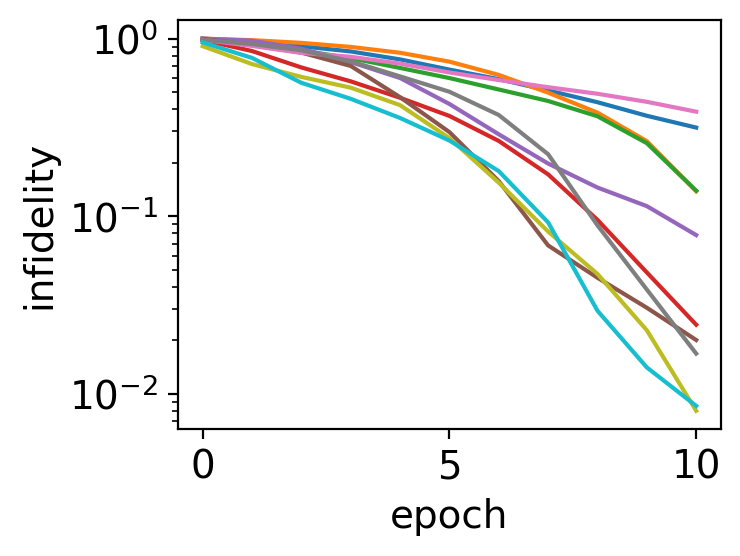

In [7]:
#We can plot the trajectories of the different parallel optimizations
analysis.plot_fidelities()

In [9]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
best_circuit = analysis.best_circuit()
print(best_circuit)
# target_state = analysis.target_state()
# print(target_state)

{'fidelity': 0.9919653, 'betas': array([-0.48657078-0.6636497j , -0.92366755+0.95187277j,
       -0.4534364 +0.5052471j ,  0.9397051 +0.86779255j,
        0.7469092 +0.78789955j,  0.03844347+0.04513734j,
       -0.4015579 +1.2585409j ,  0.45818   +0.32459822j,
        1.1753739 -1.5827773j ,  1.1842759 -1.7055929j ], dtype=complex64), 'alphas': array([-0.48657078-0.6636497j , -0.92366755+0.95187277j,
       -0.4534364 +0.5052471j ,  0.9397051 +0.86779255j,
        0.7469092 +0.78789955j,  0.03844347+0.04513734j,
       -0.4015579 +1.2585409j ,  0.45818   +0.32459822j,
        1.1753739 -1.5827773j ,  1.1842759 -1.7055929j ], dtype=complex64), 'phis': array([-0.48657078-0.6636497j , -0.92366755+0.95187277j,
       -0.4534364 +0.5052471j ,  0.9397051 +0.86779255j,
        0.7469092 +0.78789955j,  0.03844347+0.04513734j,
       -0.4015579 +1.2585409j ,  0.45818   +0.32459822j,
        1.1753739 -1.5827773j ,  1.1842759 -1.7055929j ], dtype=complex64), 'thetas': array([-0.48657078-0.663649

In [10]:
#Now, using the same opt object, we can sweep the number of blocks in the optimization.
sweeper = OptimizationSweeps(opt_object=opt)
sweeper.N_blocks_sweep(min_N_blocks=3, max_N_blocks=6, terminate=True) #"terminate" option specifies if it terminates sweep when term fid is met


starting N blocks sweep

N_blocks: 3
N blocks sweep filename: Cavity cooldown.h5
N blocks sweep name: sweep N_blocks 2020-10-26 05:59:24

Start time: 2020-10-26 05:59:24
 Epoch: 20 / 20 Max Fid: 0.743486 Avg Fid: 0.695942 Max dFid: 0.021904 Avg dFid: 0.006415 Elapsed time: 0:00:07.514571 Remaing time: 0:00:00.379046

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 3
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 20
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cavity cooldown
comment: 
N_cav: 50
filename: Cavity cooldown.h5

Best circuit parameters found:
betas:         [-0.88979+0.00301j  0.00677+1.27676j -0.00327+0.00095j]
alphas:        [0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [  0.      -89.95301   0.01218]
thetas (deg):  [-270.29703   90.451     89.93205]
Max Fidelity:  0.743488


all data saved as: Cavity cooldown.h5
te

'sweep N_blocks 2020-10-26 05:59:24'

In [11]:
#the sweep data will be nicely saved to the same h5 file. We can analyze the sweep with the sweep analysis class.
sweep_analysis = OptimizationSweepsAnalysis(filename=filename)
sweep_analysis.sweep_names #names of the sweeps it found in the file

['sweep N_blocks 2020-10-26 05:59:24']

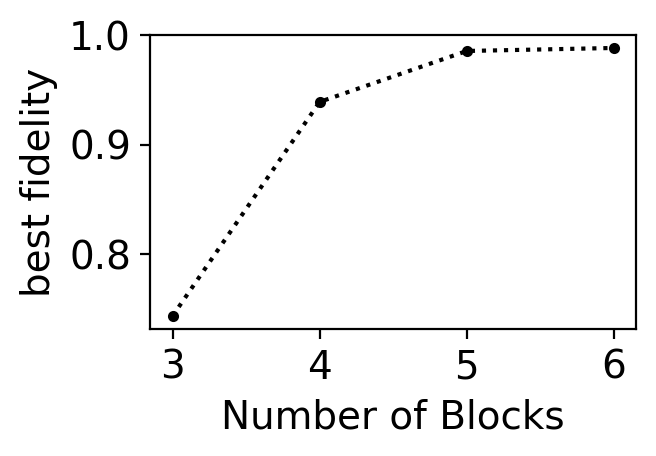

In [12]:
#we can analyze how the best fidelity found depends on the sweep parameter
sweep_analysis.plot_sweep_fidelities(log=False)

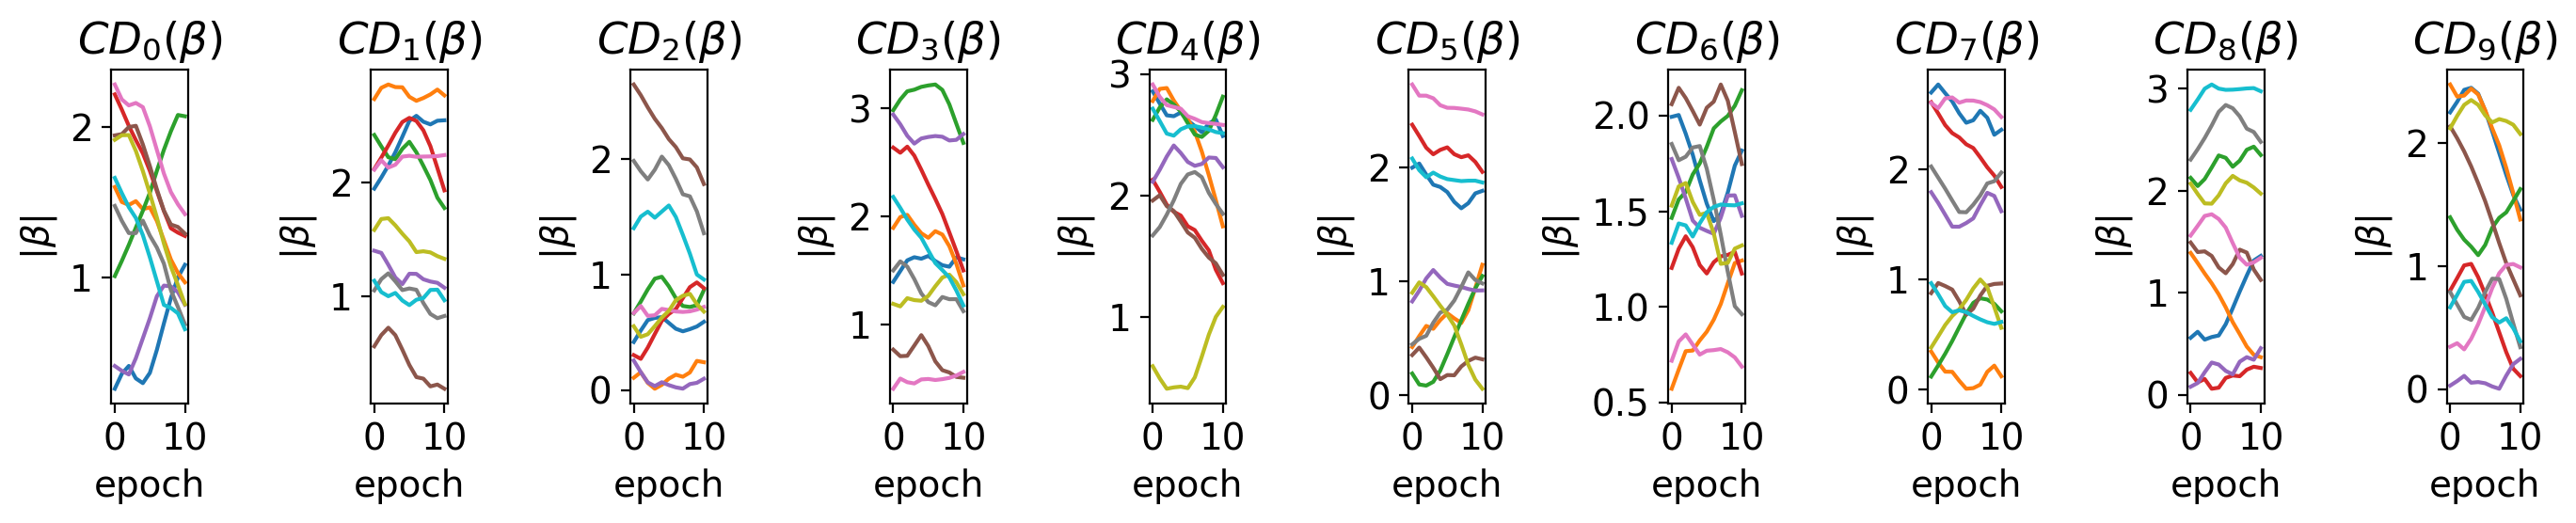

In [13]:
#there are a few other things we can plot. Better data analysis coming soon.
analysis.plot_mag_betas()

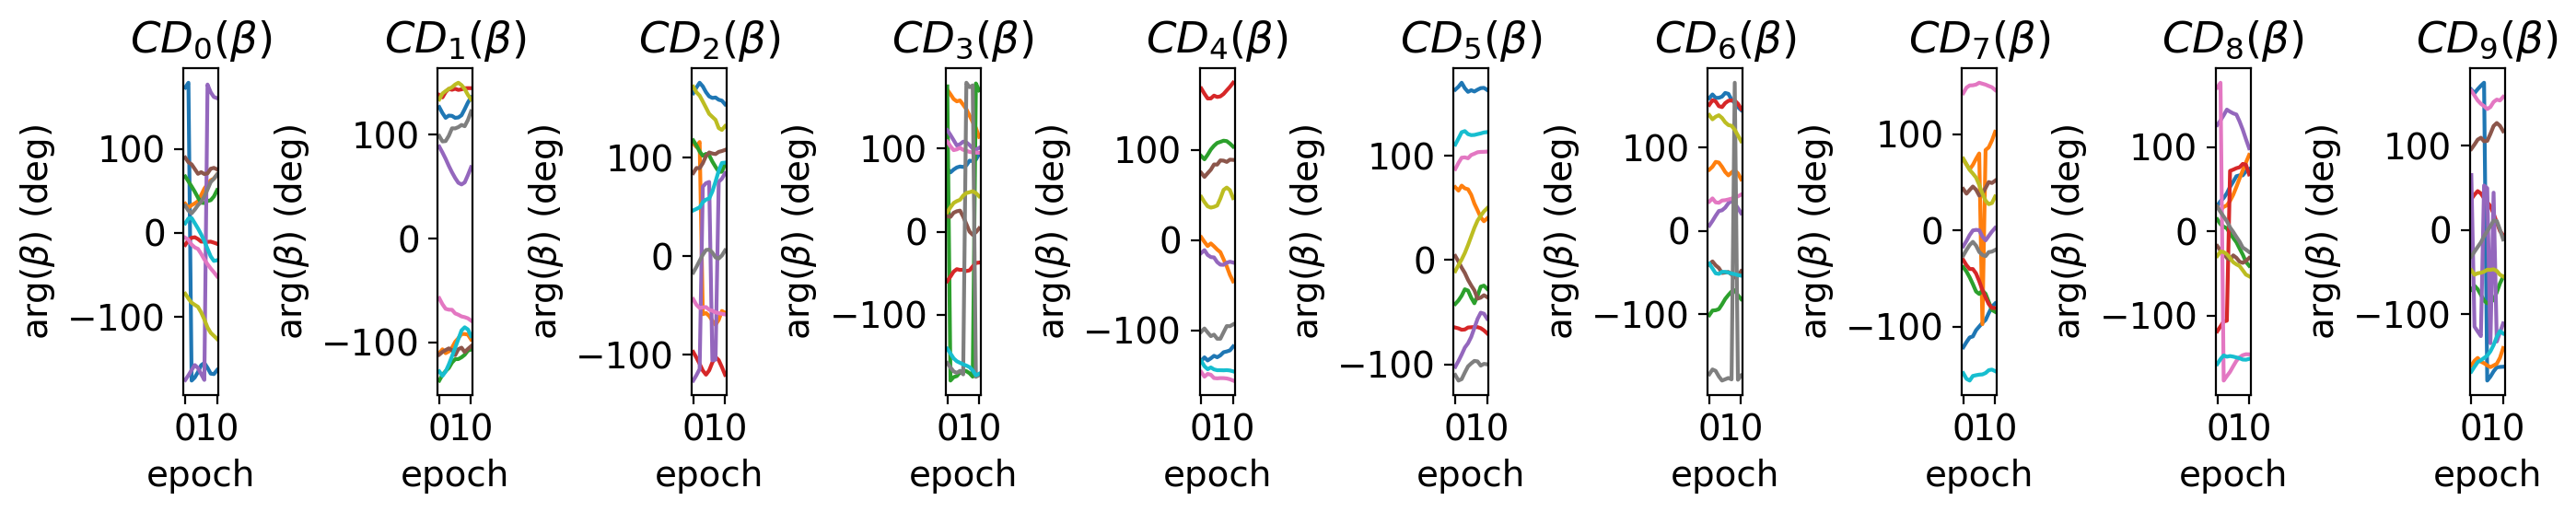

In [14]:
analysis.plot_phase_betas()

../CD_control_optimization/optimization_analysis.py:239: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


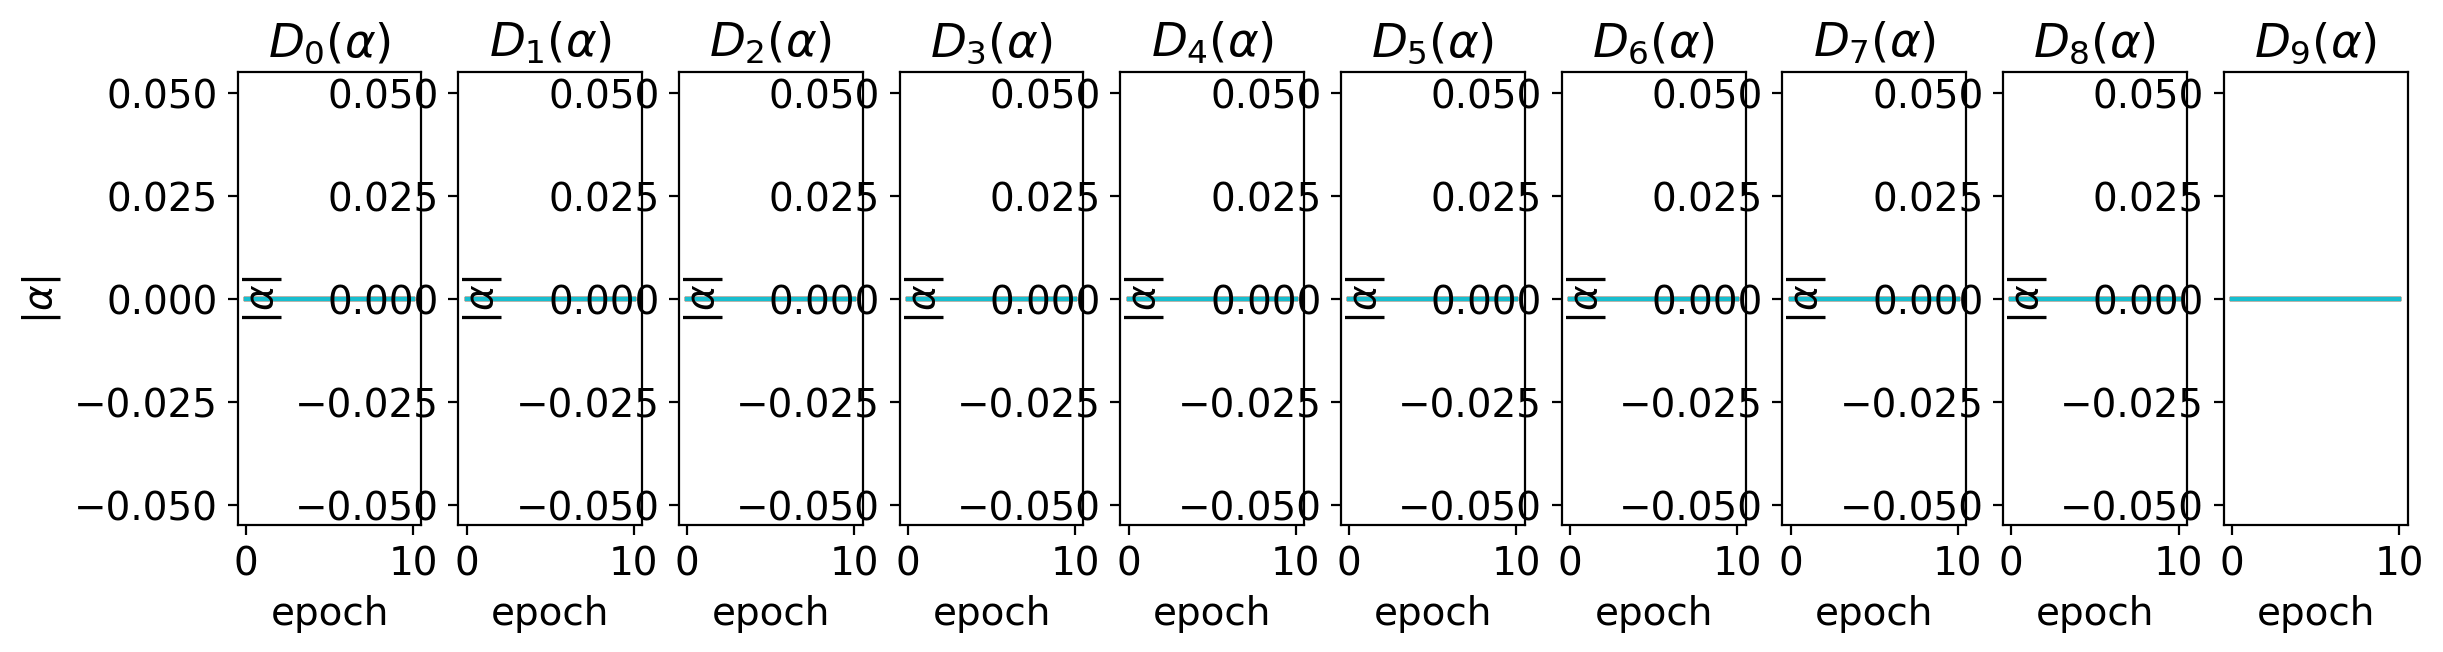

In [15]:
analysis.plot_mag_alphas()

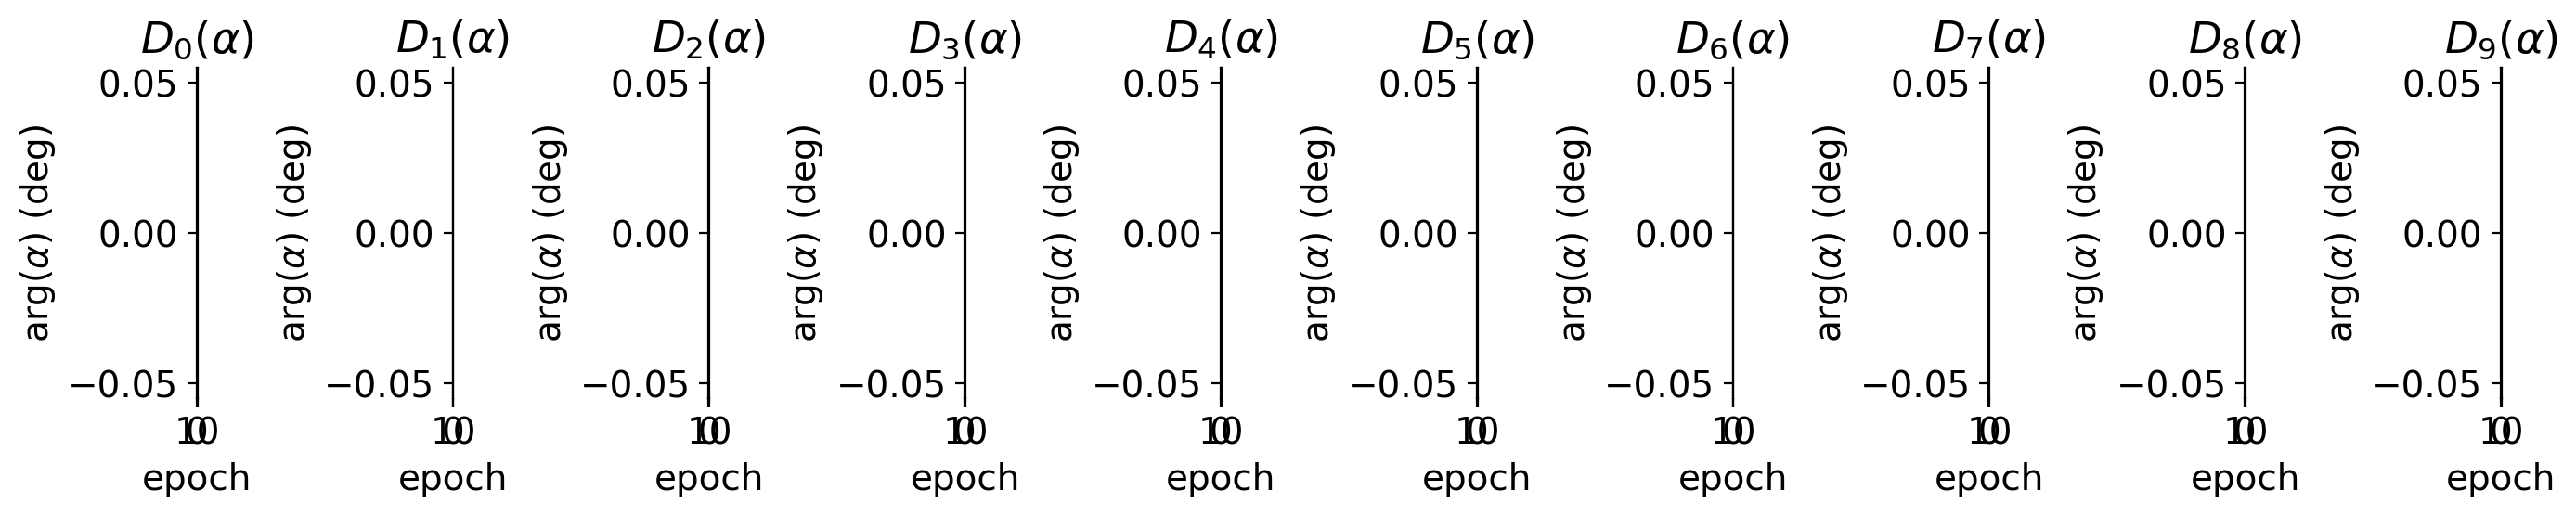

In [16]:
analysis.plot_phase_alphas()

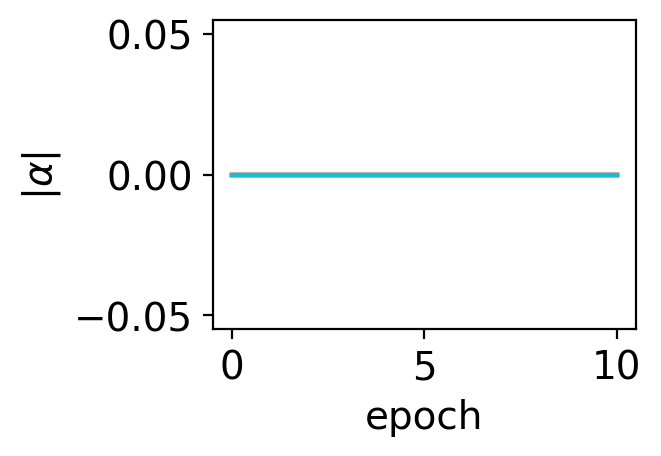

In [17]:
analysis.plot_average_magnitude_alpha()

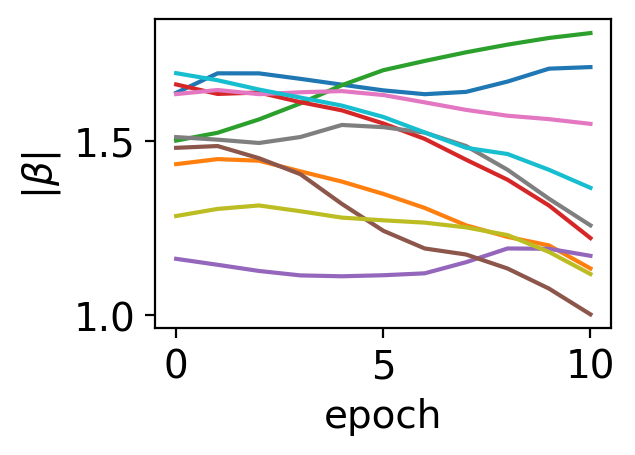

In [18]:
analysis.plot_average_magnitude_beta()